In [1]:
library(ggplot2)
library(GGally)
library(VGAM)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: stats4
Loading required package: splines


### Examples of Tobit Analysis

### Description of the Data

In [2]:
dat <- read.csv("./datasets/tobit.csv")

In [3]:
summary(dat)

       id              read            math               prog    
 Min.   :  1.00   Min.   :28.00   Min.   :33.00   academic  : 45  
 1st Qu.: 50.75   1st Qu.:44.00   1st Qu.:45.00   general   :105  
 Median :100.50   Median :50.00   Median :52.00   vocational: 50  
 Mean   :100.50   Mean   :52.23   Mean   :52.65                   
 3rd Qu.:150.25   3rd Qu.:60.00   3rd Qu.:59.00                   
 Max.   :200.00   Max.   :76.00   Max.   :75.00                   
      apt       
 Min.   :352.0  
 1st Qu.:575.5  
 Median :633.0  
 Mean   :640.0  
 3rd Qu.:705.2  
 Max.   :800.0  

In [4]:
dat

id,read,math,prog,apt
1,34,40,vocational,352
2,39,33,vocational,449
3,63,48,general,648
4,44,41,general,501
5,47,43,general,762
6,47,46,general,658
7,57,59,general,800
8,39,52,general,613
9,48,52,vocational,531
10,47,49,academic,528


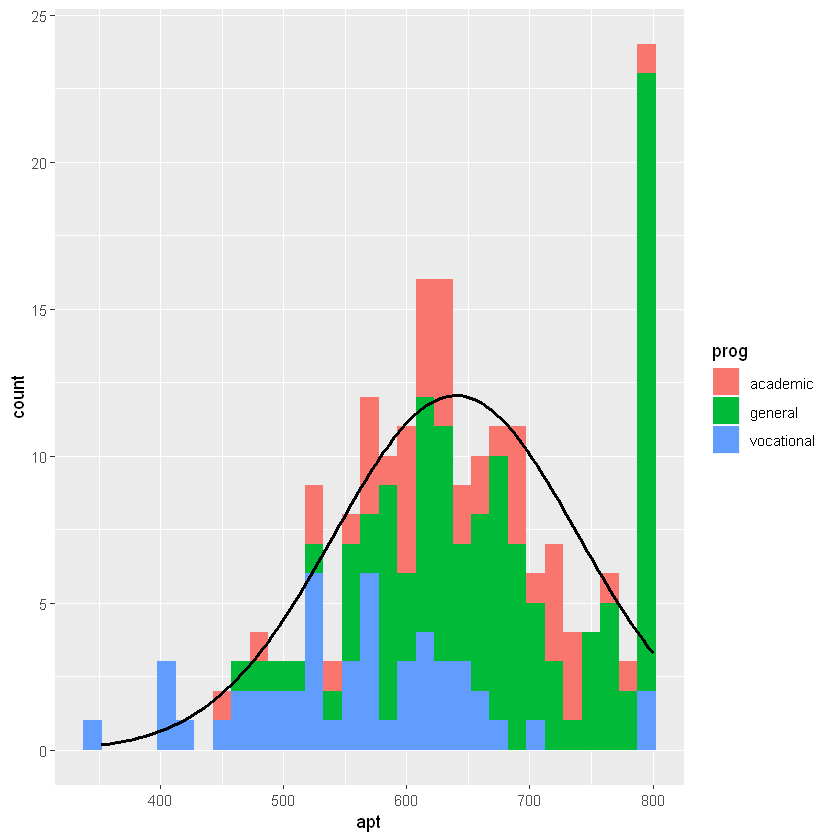

In [5]:
# function that gives the density of normal distribution
# for given mean and sd, scaled to be on a count metric
# for the histogram: count = density * sample size * bin width
f <- function(x, var, bw = 15) {dnorm(x, mean = mean(var), sd(var)) * length(var)  * bw }

# setup base plot
p <- ggplot(dat, aes(x = apt, fill=prog))

# histogram, coloured by proportion in different programs with a normal distribution overlayed
p + stat_bin(binwidth=15) + stat_function(fun = f, size = 1, args = list(var = dat$apt))

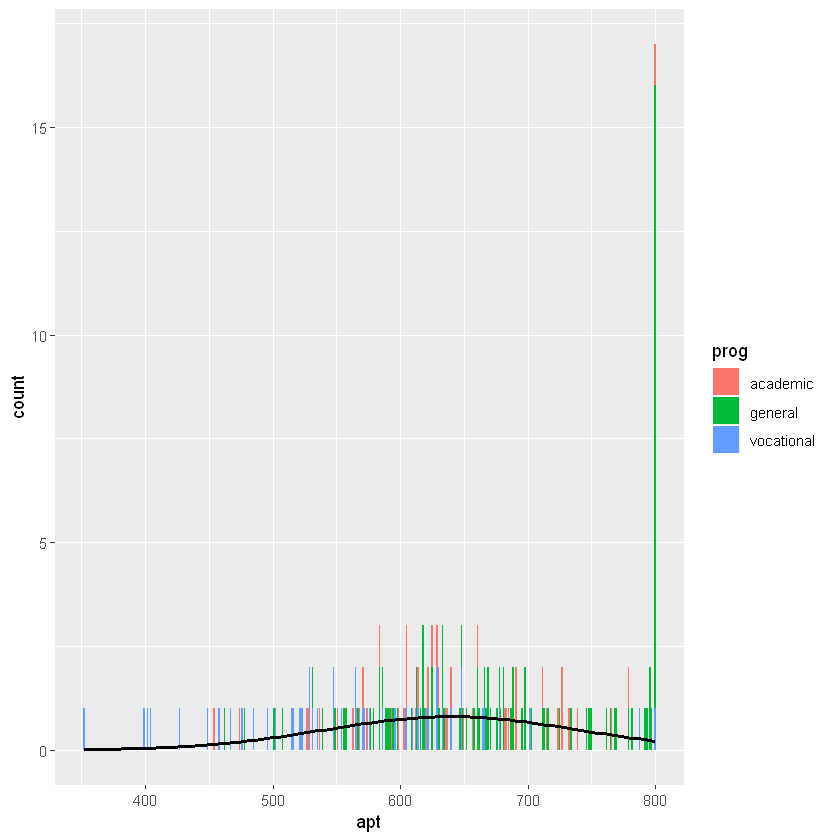

In [6]:
p + stat_bin(binwidth = 1) + stat_function(fun = f, size = 1, args = list(var = dat$apt, bw = 1))

In [7]:
cor(dat[, c("read", "math", "apt")])

,read,math,apt
read,1.0000000,0.6622801,0.6451215
math,0.6622801,1.0000000,0.7332702
apt,0.6451215,0.7332702,1.0000000


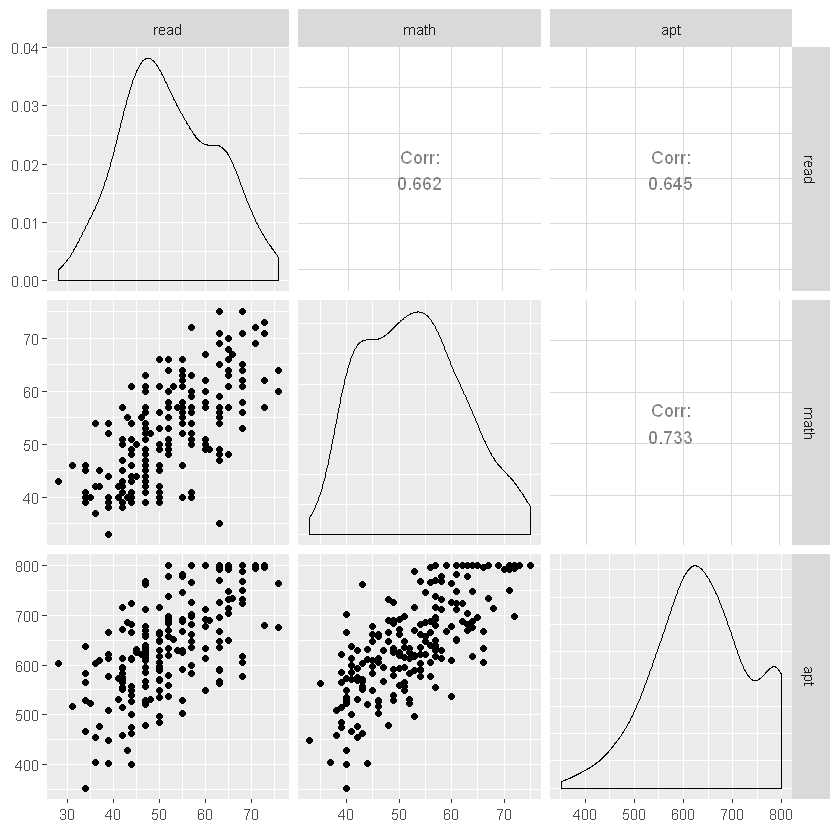

In [8]:
# plot matrix
ggpairs(dat[, c("read", "math", "apt")])

### Analysis methods you might consider

### Tobit regression

In [9]:
summary(m <- vglm(apt ~ read + math + prog, tobit(Upper = 800), data = dat))


Call:
vglm(formula = apt ~ read + math + prog, family = tobit(Upper = 800), 
    data = dat)

Pearson residuals:
                Min      1Q   Median     3Q   Max
mu          -2.5684 -0.7311 -0.03976 0.7531 2.802
loglink(sd) -0.9689 -0.6359 -0.33365 0.2364 4.845

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)    
(Intercept):1  209.55956   32.54590   6.439 1.20e-10 ***
(Intercept):2    4.18476    0.05235  79.944  < 2e-16 ***
read             2.69796    0.61928   4.357 1.32e-05 ***
math             5.91460    0.70539   8.385  < 2e-16 ***
proggeneral    -12.71458   12.40857  -1.025 0.305523    
progvocational -46.14327   13.70667  -3.366 0.000761 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Names of linear predictors: mu, loglink(sd)

Log-likelihood: -1041.063 on 394 degrees of freedom

Number of Fisher scoring iterations: 5 

No Hauck-Donner effect found in any of the estimates


In [10]:
ctable <- coef(summary(m))
pvals <- 2 * pt(abs(ctable[, "z value"]), df.residual(m), lower.tail = FALSE)
cbind(ctable, pvals)

,Estimate,Std. Error,z value,Pr(>|z|),pvals
(Intercept):1,209.559557,32.54589921,6.438893,1.203481e-10,3.505839e-10
(Intercept):2,4.184759,0.05234618,79.943922,0.000000e+00,1.299833e-245
read,2.697959,0.61927743,4.356625,1.320835e-05,1.686815e-05
math,5.914596,0.70538721,8.384892,5.077232e-17,9.122434e-16
proggeneral,-12.714581,12.40856959,-1.024661,3.055230e-01,3.061517e-01
progvocational,-46.143271,13.70667208,-3.366482,7.613343e-04,8.361912e-04


In [11]:
m2 <- vglm(apt ~ read + math, tobit(Upper = 800), data = dat)
(p <- pchisq(2 * (logLik(m) - logLik(m2)), df = 2, lower.tail = FALSE))

[1] 0.003155176

In [12]:
b <- coef(m)
se <- sqrt(diag(vcov(m)))
cbind(LL = b - qnorm(0.975) * se, UL = b + qnorm(0.975) * se)

,LL,UL
(Intercept):1,145.770767,273.348348
(Intercept):2,4.082163,4.287356
read,1.484198,3.911721
math,4.532062,7.297129
proggeneral,-37.034931,11.605768
progvocational,-73.007854,-19.278687


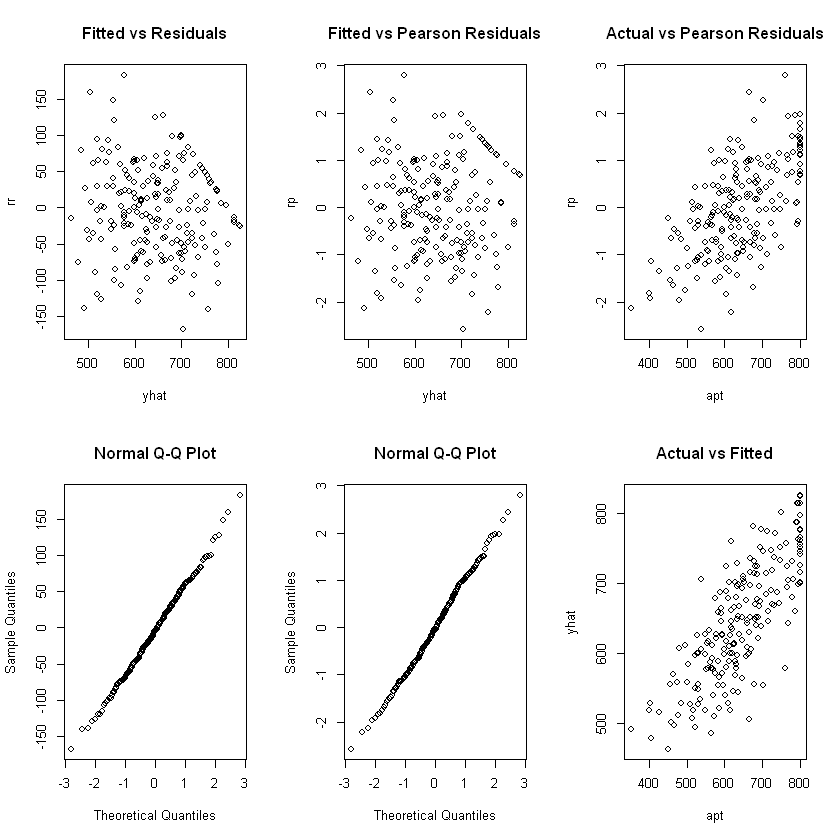

In [13]:
dat$yhat <- fitted(m)[,1]
dat$rr <- resid(m, type = "response")
dat$rp <- resid(m, type = "pearson")[,1]

par(mfcol = c(2, 3))

with(dat, {
    plot(yhat, rr, main = "Fitted vs Residuals")
    qqnorm(rr)
    plot(yhat, rp, main = "Fitted vs Pearson Residuals")
    qqnorm(rp)
    plot(apt, rp, main = "Actual vs Pearson Residuals")
    plot(apt, yhat, main = "Actual vs Fitted")  })

In [14]:
# correlation
(r <- with(dat, cor(yhat, apt)))

[1] 0.7824708

In [15]:
# variance accounted for
r^2

[1] 0.6122606